In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Semester4/DS250/Wikipedia/edges.csv")

In [3]:
df.head()

,Unnamed: 0,From,To
0,0,https://en.wikipedia.org/wiki/Antiderivative,https://en.wikipedia.org//wiki/Antiderivative_...
1,1,https://en.wikipedia.org/wiki/Antiderivative,https://en.wikipedia.org//wiki/Lists_of_integrals
2,2,https://en.wikipedia.org/wiki/Antiderivative,https://en.wikipedia.org//wiki/Calculus
3,3,https://en.wikipedia.org/wiki/Antiderivative,https://en.wikipedia.org//wiki/Fundamental_the...
4,4,https://en.wikipedia.org/wiki/Antiderivative,https://en.wikipedia.org//wiki/Leibniz_integra...


In [3]:
frm = df['From'].values
to = df['To'].values

edges = []
for f,t in zip(frm,to):
  edges.append((f,t))

test = []
c = 0
for f,t in zip(frm,to):
  c+=1
  if c==1000:break
  test.append((f,t))

In [4]:
g = nx.Graph()
g.add_edges_from(edges)

gt = nx.Graph()
gt.add_edges_from(test)

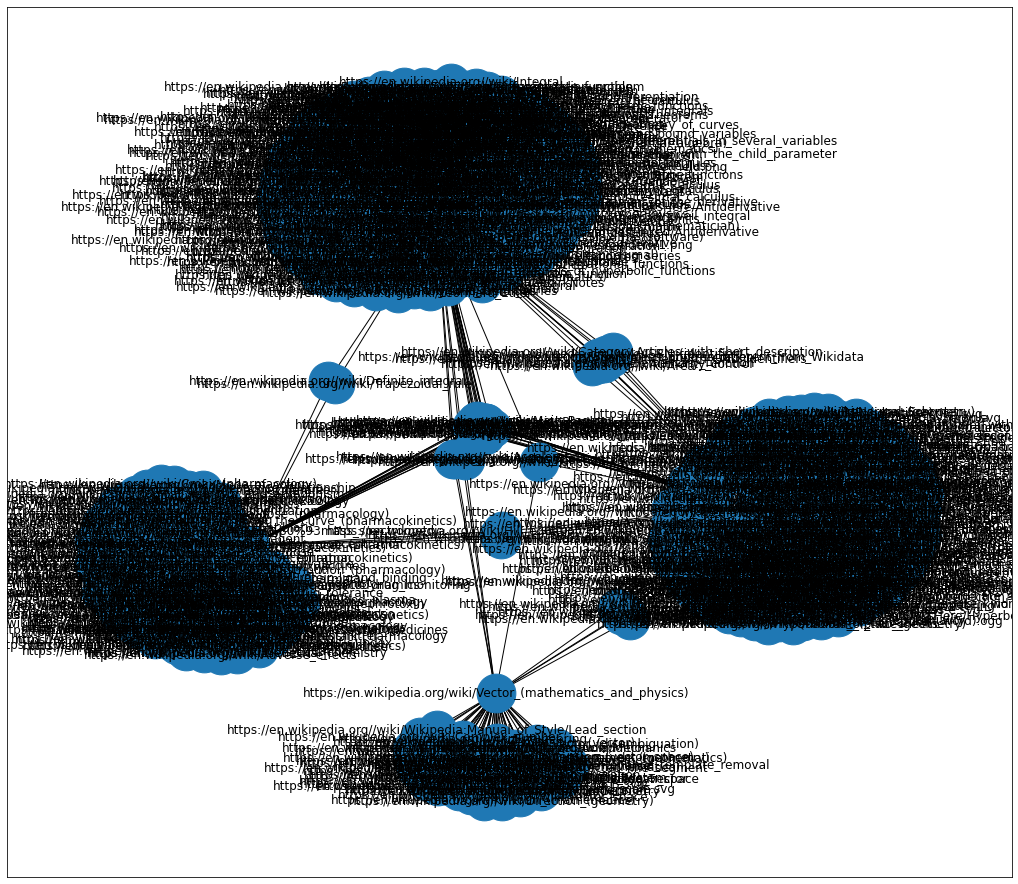

In [14]:
fig = plt.figure(figsize=(18,16))
pos = nx.spring_layout(gt, scale=4)
nx.draw_networkx(gt,pos,node_size=1500)#,node_color=node_colors,width=1,node_size=1500)

In [15]:
nx.degree_centrality(gt)

{'https://en.wikipedia.org//wiki/(%CE%B5,_%CE%B4)-definition_of_limit': 0.0014084507042253522,
 'https://en.wikipedia.org//wiki/0_(number)': 0.0014084507042253522,
 'https://en.wikipedia.org//wiki/ADME': 0.0014084507042253522,
 'https://en.wikipedia.org//wiki/Abel%27s_test': 0.0014084507042253522,
 'https://en.wikipedia.org//wiki/Absorption_(pharmacokinetics)': 0.0014084507042253522,
 'https://en.wikipedia.org//wiki/Acceleration': 0.0028169014084507044,
 'https://en.wikipedia.org//wiki/Acceleration_(physics)': 0.0014084507042253522,
 'https://en.wikipedia.org//wiki/Addison-Wesley': 0.0014084507042253522,
 'https://en.wikipedia.org//wiki/Addition': 0.0014084507042253522,
 'https://en.wikipedia.org//wiki/Additive_inverse': 0.0014084507042253522,
 'https://en.wikipedia.org//wiki/Adequality': 0.0014084507042253522,
 'https://en.wikipedia.org//wiki/Adverse_effects': 0.0014084507042253522,
 'https://en.wikipedia.org//wiki/Affine_transformation': 0.0014084507042253522,
 'https://en.wikipedia.

In [18]:
# computing degree centrality
dc = pd.DataFrame(columns=['Link','Degree Centrality'])
dcc = nx.degree_centrality(g)
dc['Link'] = dcc.keys()
dc['Degree Centrality']  = dcc.values()
dc.head()

,Link,Degree Centrality
0,https://en.wikipedia.org/wiki/Antiderivative,0.002370
1,https://en.wikipedia.org//wiki/Antiderivative_...,0.000679
2,https://en.wikipedia.org//wiki/Lists_of_integrals,0.002765
3,https://en.wikipedia.org//wiki/Calculus,0.007766
4,https://en.wikipedia.org//wiki/Fundamental_the...,0.002599


In [19]:
dc.to_csv('/content/drive/MyDrive/Semester4/DS250/Wikipedia/deg_cent.csv')

In [5]:
# computing betweeness centrality
bc = pd.DataFrame(columns=['Link','Betweenness Centrality'])
bcc = nx.betweenness_centrality(gt)
bc['Link'] = bcc.keys()
bc['Betweenness Centrality']  = bcc.values()
bc.head()
# I am running this algorithm on a small part of the huge wikipedia graph because of 
# the time that it takes to complete

,Link,Betweenness Centrality
0,https://en.wikipedia.org/wiki/Antiderivative,0.641268
1,https://en.wikipedia.org//wiki/Antiderivative_...,0.000000
2,https://en.wikipedia.org//wiki/Lists_of_integrals,0.000000
3,https://en.wikipedia.org//wiki/Calculus,0.000000
4,https://en.wikipedia.org//wiki/Fundamental_the...,0.000000


In [6]:
bc.to_csv('/content/drive/MyDrive/Semester4/DS250/Wikipedia/betw_cent.csv')

In [8]:
# computing betweeness centrality
ec = pd.DataFrame(columns=['Link','Eigenvector Centrality'])
ecc = nx.eigenvector_centrality(g)
ec['Link'] = ecc.keys()
ec['Eigenvector Centrality']  = ecc.values()
ec.head()

,Link,Eigenvector Centrality
0,https://en.wikipedia.org/wiki/Antiderivative,0.048179
1,https://en.wikipedia.org//wiki/Antiderivative_...,0.012294
2,https://en.wikipedia.org//wiki/Lists_of_integrals,0.047441
3,https://en.wikipedia.org//wiki/Calculus,0.063457
4,https://en.wikipedia.org//wiki/Fundamental_the...,0.048142


In [9]:
ec.to_csv('/content/drive/MyDrive/Semester4/DS250/Wikipedia/eigen_cent.csv')

In [13]:
# computing betweeness centrality
cc = pd.DataFrame(columns=['Link','Closeness Centrality'])
ccc = nx.closeness_centrality(gt)
cc['Link'] = ccc.keys()
cc['Closeness Centrality']  = ccc.values()
cc.head()
# I am running this algorithm on a small part of the huge wikipedia graph because of 
# the time that it takes to complete

,Link,Closeness Centrality
0,https://en.wikipedia.org/wiki/Antiderivative,0.464964
1,https://en.wikipedia.org//wiki/Antiderivative_...,0.317531
2,https://en.wikipedia.org//wiki/Lists_of_integrals,0.317531
3,https://en.wikipedia.org//wiki/Calculus,0.317531
4,https://en.wikipedia.org//wiki/Fundamental_the...,0.317531


In [14]:
cc.to_csv('/content/drive/MyDrive/Semester4/DS250/Wikipedia/close_cent.csv')

In [23]:
 # Using the louvain algorithm for community detection
import community.community_louvain as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [24]:
# Here I am finding the communities on a subgraph
partition = community_louvain.best_partition(gt)

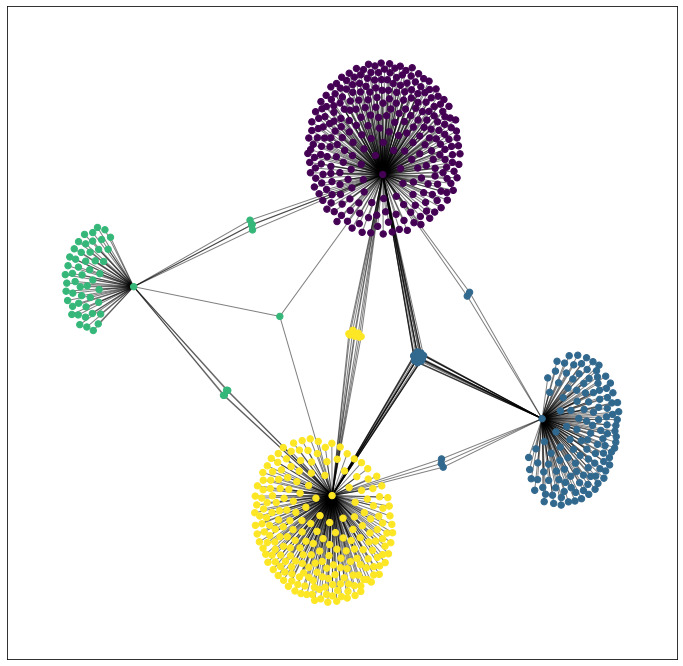

In [27]:
fig = plt.figure(figsize=(12,12))
# draw the graph
pos = nx.spring_layout(gt)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(gt, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(gt, pos, alpha=0.5)
plt.show()

In [ ]:
# I will now try some clustering algorithms

In [33]:
# Triangles
t = nx.triangles(g)
tt = pd.DataFrame(columns=['Link','Triangles'])
tt['Link'] = t.keys()
tt['Triangles'] = t.values()
tt.head()
# Takes 35 seconds

,Link,Triangles
0,https://en.wikipedia.org/wiki/Antiderivative,22748
1,https://en.wikipedia.org//wiki/Antiderivative_...,890
2,https://en.wikipedia.org//wiki/Lists_of_integrals,22898
3,https://en.wikipedia.org//wiki/Calculus,35891
4,https://en.wikipedia.org//wiki/Fundamental_the...,23321


In [35]:
tt.to_csv('/content/drive/MyDrive/Semester4/DS250/Wikipedia/triangles.csv')

In [34]:
# Clustering coefficient
cco = nx.clustering(g)
coo = pd.DataFrame(columns=['Link','Clustering Coefficient'])
coo['Link'] = cco.keys()
coo['Clustering Coefficient'] = cco.values()
coo.head()

,Link,Clustering Coefficient
0,https://en.wikipedia.org/wiki/Antiderivative,0.507202
1,https://en.wikipedia.org//wiki/Antiderivative_...,0.255307
2,https://en.wikipedia.org//wiki/Lists_of_integrals,0.379244
3,https://en.wikipedia.org//wiki/Calculus,0.074666
4,https://en.wikipedia.org//wiki/Fundamental_the...,0.437534


In [36]:
coo.to_csv('/content/drive/MyDrive/Semester4/DS250/Wikipedia/cluster_coef.csv')